# Kiva EDA

### Описание данных:

**kiva_loans** — набор данных c информацией о займах:
- id — уникальный идентификатор для кредита;
- funded_amount — сумма, выплаченная Kiva агенту на местах (USD);
- loan_amount — сумма, выплаченная полевым агентом заёмщику (USD);
- sector — сектор использования займа;
- activity — более гранулированная категория;
- use — назначение использования суммы кредита;
- country_code — ISO-код страны страны, в которой был выдан заём;
- country — полное название страны, в которой был выдан кредит;
- posted_time — время, в которое заявка была опубликована на Kiva;
- disbursed_time — время, когда кредитный агент выдал заёмщику сумму;
- funded_time — время, когда заявка полностью финансируется кредиторами;
- term_in_months — срок, на который был выдан кредит, в месяцах;
- lender_count — общее количество кредиторов, которые внесли свой вклад в этот кредит;
- loaner_genders — разделённые запятыми буквы M и F, где каждый экземпляр представляет одного мужчину / одну женщину в группе.

**kiva_mpi_region_locations** — набор данных с информацией о регионах и MPI. Global Multidimensional Poverty Index — глобальный индекс бедности. Чем больше это значение, тем выше бедность в соответствующем регионе:
- country — страна;
- region — регион в стране;
- world_region — часть света;
- MPI — многомерный индекс бедности;
- geo — координаты (широта, долгота).



### Препроцессинг:

Импорт библиотек:

In [24]:
import numpy as np
import pandas as pd
import math
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

Загрузка данных:

In [25]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")

_________

In [26]:
df_kiva_loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [27]:
df_mpi.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754


Проверка пропусков

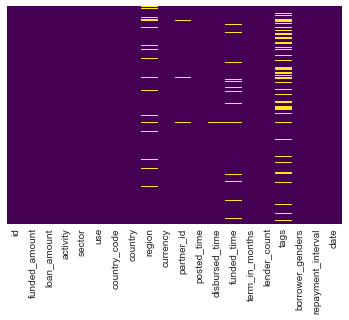

In [28]:
sns.heatmap(df_kiva_loans.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');

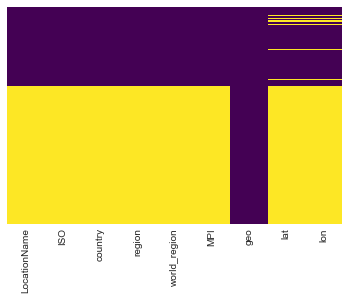

In [29]:
sns.heatmap(df_mpi.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');

In [30]:
df_kiva_loans.info()
df_mpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

Удаление NaN'ов:

In [31]:
df_kiva_loans.dropna(inplace=True)
df_mpi.dropna(inplace=True)

In [32]:
df_kiva_loans.info()
df_mpi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423081 entries, 2 to 671141
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  423081 non-null  int64  
 1   funded_amount       423081 non-null  float64
 2   loan_amount         423081 non-null  float64
 3   activity            423081 non-null  object 
 4   sector              423081 non-null  object 
 5   use                 423081 non-null  object 
 6   country_code        423081 non-null  object 
 7   country             423081 non-null  object 
 8   region              423081 non-null  object 
 9   currency            423081 non-null  object 
 10  partner_id          423081 non-null  float64
 11  posted_time         423081 non-null  object 
 12  disbursed_time      423081 non-null  object 
 13  funded_time         423081 non-null  object 
 14  term_in_months      423081 non-null  float64
 15  lender_count        423081 non-nul

_____________

Поиск корелляции между сроком кредита (term_in_months), количеством кредиторов, которые внесли свой вклад в этот кредит (lender_count) и суммой займа (loan_amount):

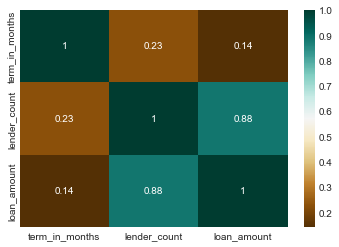

In [33]:
df_temp = df_kiva_loans[['term_in_months', 'lender_count', 'loan_amount']]
df_corr = df_temp.corr()
sns.heatmap(data=df_corr, cmap='BrBG', annot=True);

Визуализация сумм займа:

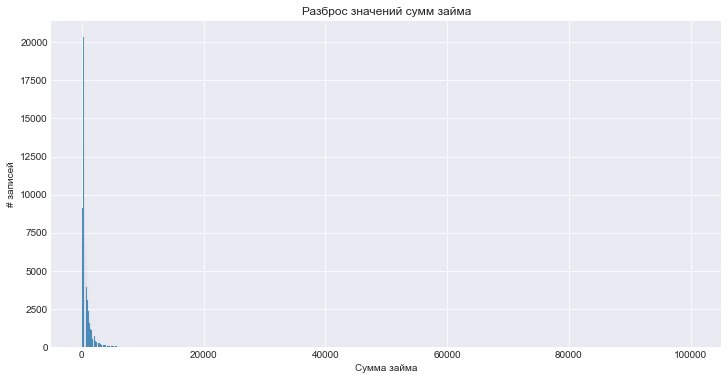

In [34]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=df_kiva_loans['funded_amount'], ax=ax)
ax.set_xlabel('Сумма займа')
ax.set_ylabel('# записей')
ax.set_title('Разброс значений сумм займа')

plt.show()

Изучение выбросов (кредитов более чем на 20000):

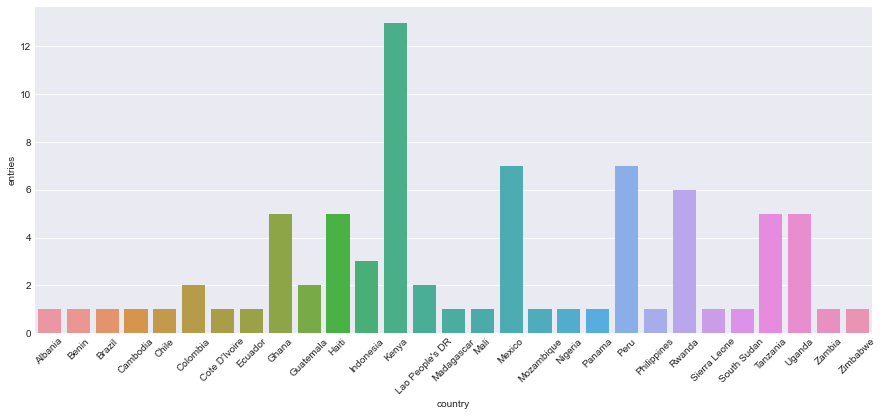

In [35]:
df_largest_loans = df_kiva_loans[df_kiva_loans['funded_amount'] > 20000].groupby('country').size().reset_index()
df_largest_loans.rename(columns={0 : 'entries'}, inplace=True)
df_largest_loans.at[13, 'country'] = "Lao People's DR"

fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=df_largest_loans, x='country', y='entries', ax=ax)
ax.tick_params(axis='x', rotation=45)


____________

Средний уровень бедности в регионах:

In [36]:
df_poorest_regs = df_mpi.groupby('region').mean().sort_values('MPI', ascending=False)['MPI'].to_frame()
df_poorest_regs

,MPI
region,
Lac,0.744
Wadi Fira,0.709
Sila,0.697
Kanem,0.696
Sahel,0.690
...,...
Damascus,0.003
St. James,0.003
As-swidaa,0.002


Диаграмма MPI в различных странах:

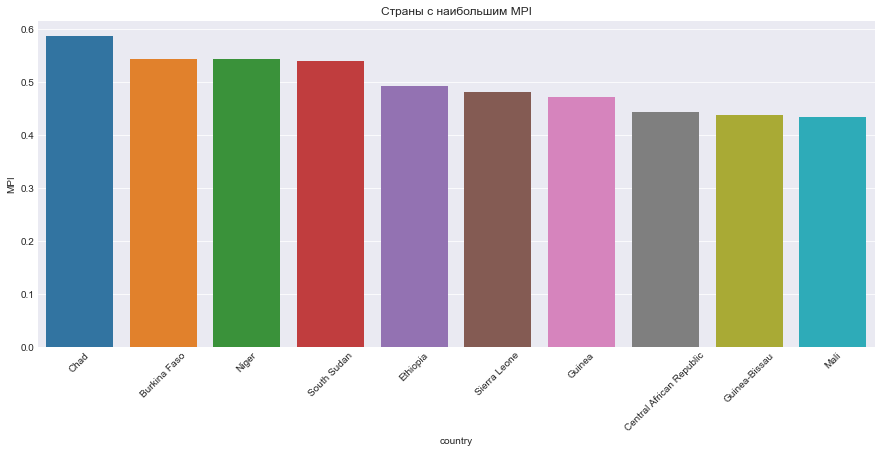

In [14]:
df_poorest_countries = df_mpi.groupby('country').mean().sort_values('MPI', ascending=False)['MPI'].reset_index()[:10]

fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=df_poorest_countries, x='country', y='MPI')

ax.tick_params(axis='x', rotation=45)
ax.set_title('Страны с наибольшим MPI')

plt.show()